In [10]:
import pandas as pd
tennis = pd.read_csv("https://raw.githubusercontent.com/abhinav12347/stat-517/master/Stats_Final_Project_517_Updated_Abhinav.csv")
tennis.head()

,Unnamed: 0,X,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1,1,32,A,20180101,300,106401,Nick Kyrgios,1,193,...,5,8,3,58,32,22,12,9,4,7
1,2,2,32,A,20180101,299,106401,Nick Kyrgios,1,193,...,2,5,6,74,44,32,16,13,3,6
2,3,3,32,A,20180101,298,105992,Ryan Harrison,1,183,...,6,9,5,94,62,49,16,16,0,3
3,4,4,32,A,20180101,297,105777,Grigor Dimitrov,1,188,...,2,6,1,89,53,39,23,15,4,6
4,5,5,32,A,20180101,296,106401,Nick Kyrgios,1,193,...,3,6,3,75,41,33,16,13,2,4


In [12]:
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:

print (tennis.columns.values)
print (tennis.describe(include=['O']))

['Unnamed: 0' 'X' 'draw_size' 'tourney_level' 'tourney_date' 'match_num'
 'winner_id' 'winner_name' 'winner_hand' 'winner_ht' 'winner_ioc'
 'winner_age' 'winner_rank_points' 'loser_id' 'loser_name' 'loser_hand'
 'loser_ht' 'loser_ioc' 'loser_age' 'loser_rank_points' 'best_of' 'round'
 'minutes' 'w_ace' 'w_df' 'w_svpt' 'w_1stIn' 'w_1stWon' 'w_2ndWon'
 'w_SvGms' 'w_bpSaved' 'w_bpFaced' 'l_ace' 'l_df' 'l_svpt' 'l_1stIn'
 'l_1stWon' 'l_2ndWon' 'l_SvGms' 'l_bpSaved' 'l_bpFaced']
       tourney_level    winner_name winner_ioc       loser_name loser_hand  \
count          97888          97888      97888            97888      97857   
unique             6           2223        121             3271          3   
top                A  Roger Federer        USA  Fabrice Santoro          R   
freq           57264           1179      12034              444      80995   

       loser_ioc  round  
count      97888  97888  
unique       129      9  
top          USA    R32  
freq       10856  32312  


In [14]:
import seaborn as sns
tennis.head()

,Unnamed: 0,X,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1,1,32,A,20180101,300,106401,Nick Kyrgios,1,193,...,5,8,3,58,32,22,12,9,4,7
1,2,2,32,A,20180101,299,106401,Nick Kyrgios,1,193,...,2,5,6,74,44,32,16,13,3,6
2,3,3,32,A,20180101,298,105992,Ryan Harrison,1,183,...,6,9,5,94,62,49,16,16,0,3
3,4,4,32,A,20180101,297,105777,Grigor Dimitrov,1,188,...,2,6,1,89,53,39,23,15,4,6
4,5,5,32,A,20180101,296,106401,Nick Kyrgios,1,193,...,3,6,3,75,41,33,16,13,2,4


## Data Modelling

The dataset consists of few catregorical values. These values should be converted into continuous variables, such that it would be easier for analysis. Hence, we make use of the pandas to get dummy values and then fill in the categorical values.

In [16]:
tennis_new = pd.get_dummies(tennis, columns=["tourney_level", "winner_name", "winner_ioc", "loser_name", "loser_hand", "loser_ioc", "round"])
print (tennis_new.shape)
tennis_new.head()

(97888, 5796)


,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,loser_ioc_ZIM,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1,1,32,20180101,300,106401,1,193,22.683094,2010,...,0,0,1,0,0,0,0,0,0,0
1,2,2,32,20180101,299,106401,1,193,22.683094,2010,...,0,0,0,0,0,0,0,0,0,1
2,3,3,32,20180101,298,105992,1,183,25.653662,1010,...,0,0,0,0,0,0,0,0,0,1
3,4,4,32,20180101,297,105777,1,188,26.631075,5150,...,0,0,0,1,0,0,0,0,0,0
4,5,5,32,20180101,296,106401,1,193,22.683094,2010,...,0,0,0,1,0,0,0,0,0,0


In [17]:
overwrite = {"winner_hand": {2: 1}}
tennis_new.replace(overwrite, inplace = True)
tennis_new.head()

,Unnamed: 0,X,draw_size,tourney_date,match_num,winner_id,winner_hand,winner_ht,winner_age,winner_rank_points,...,loser_ioc_ZIM,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,1,1,32,20180101,300,106401,1,193,22.683094,2010,...,0,0,1,0,0,0,0,0,0,0
1,2,2,32,20180101,299,106401,1,193,22.683094,2010,...,0,0,0,0,0,0,0,0,0,1
2,3,3,32,20180101,298,105992,1,183,25.653662,1010,...,0,0,0,0,0,0,0,0,0,1
3,4,4,32,20180101,297,105777,1,188,26.631075,5150,...,0,0,0,1,0,0,0,0,0,0
4,5,5,32,20180101,296,106401,1,193,22.683094,2010,...,0,0,0,1,0,0,0,0,0,0


C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


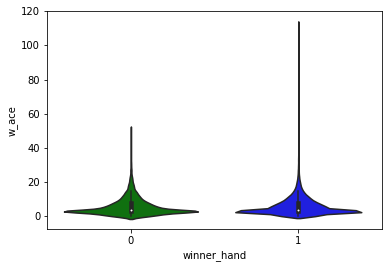

In [26]:
sns.violinplot("winner_hand", "w_ace", data=tennis_new, palette=["green", "blue"]);

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


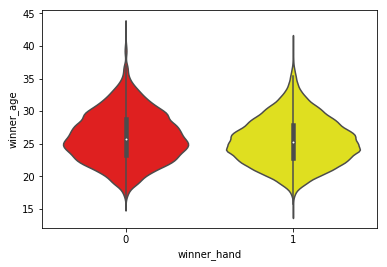

In [28]:
sns.violinplot("winner_hand", "winner_age", data=tennis_new, palette=["red", "yellow"]);

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


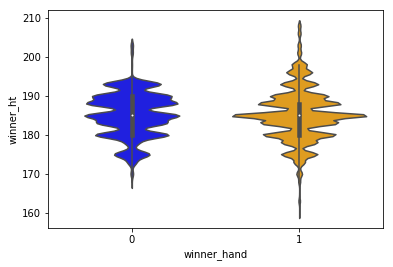

In [30]:
sns.violinplot("winner_hand", "winner_ht", data=tennis_new, palette=["blue", "orange"]);

In [32]:
import pandas as pd
from sklearn.cross_validation import train_test_split
y_tennis_new = pd.DataFrame([tennis_new.winner_hand]).T
X_tennis_new = pd.DataFrame(tennis_new)
X_tennis_new = tennis_new.drop(['winner_hand'], axis = 1)
X_tennis_new
X_train, X_test, y_train, y_test = train_test_split(X_tennis_new, y_tennis_new, random_state = 0, test_size = 0.25)


C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic Regression

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_prediction = lr.predict(X_test)
lr_training = round(lr.score(X_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(lr_training))
lr_testing = round(accuracy_score(y_test, y_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(lr_testing))
roc_auc_score(y_test, y_prediction)

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 85.72
Testing accuracy = 86.35


0.5

In [21]:
print (tennis_new["winner_hand"].value_counts())


1    84064
0    13824
Name: winner_hand, dtype: int64


## K - Nearest Neighbour:

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_prediction_knn = knn.predict(X_test)

knn_training = round(knn.score(X_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(knn_training))
knn_testing = round(accuracy_score(y_test, y_prediction_knn) * 100, 2)
print ('Testing accuracy = {}'.format(knn_testing))
roc_auc_score(y_test, y_prediction_knn)





C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Training accuracy = 87.87
Testing accuracy = 86.58


0.5619264877400225

## Decision Tree:

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dr_prediction = dt.predict(X_test)
dt_accuracy_training = round(dt.score(X_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(dt_accuracy_training))
dt_accuracy_testing = round(accuracy_score(y_test, y_dr_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(dt_accuracy_testing))
roc_auc_score(y_test, y_dr_prediction)


Training accuracy = 100.0
Testing accuracy = 99.96


0.9989047742108061

## Naive Bayes:

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb = nb.predict(X_test)
nb_accuracy_training = round(nb.score(X_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(nb_accuracy_training))
nb_accuracy_testing = round(accuracy_score(y_test, y_nb) * 100, 2)
print ('Testing accuracy = {}'.format(nb_accuracy_testing))
roc_auc_score(y_test, y_nb)

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy = 84.1
Testing accuracy = 84.77


0.5101273602709402

## Random Forest:

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_rf_prediction = rf.predict(X_test)
rf_accuracy_training = round(rf.score(X_train, y_train) * 100, 2)
print ('Training accuracy = {}'.format(rf_accuracy_training))
rf_accuracy_testing = round(accuracy_score(y_test, y_rf_prediction) * 100, 2)
print ('Testing accuracy = {}'.format(rf_accuracy_testing))
roc_auc_score(y_test, y_rf_prediction)

C:\Users\adar1656\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training accuracy = 100.0
Testing accuracy = 99.29


0.9741017964071856

In [40]:
result = pd.DataFrame({'Types of Models':['Logical Regression', 'K Nearest Neighbour', 'Decision Tree', 
                                 'Naive Bayes',' Random Forest'],
             'Training percentage' : [lr_training, knn_training, dt_accuracy_training, nb_accuracy_training,  
                                      rf_accuracy_training],
             'Testing percentage' : [lr_testing, knn_testing, dt_accuracy_testing, nb_accuracy_testing,
                                      rf_accuracy_testing ],
             'Roc value' : [0.5, 0.56, 0.99, 0.51, 0.97 ]})

In [41]:
result

,Types of Models,Training percentage,Testing percentage,Roc value
0,Logical Regression,85.72,86.35,0.50
1,K Nearest Neighbour,87.87,86.58,0.56
2,Decision Tree,100.00,99.96,0.99
3,Naive Bayes,84.10,84.77,0.51
4,Random Forest,100.00,99.29,0.97


Text(0,0.5,'Accuracy')

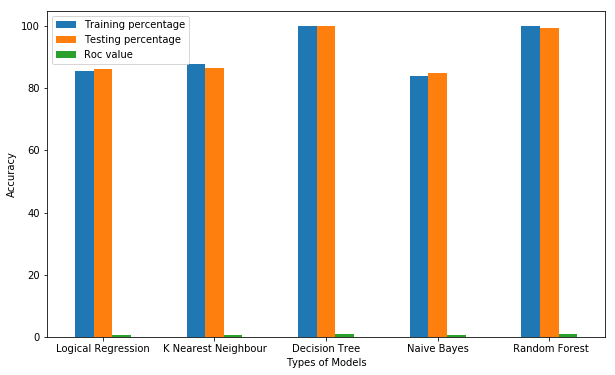

In [42]:
result.plot(kind = 'bar', x = 'Types of Models', figsize = (10, 6))
plt.xticks(rotation = 'horizontal')
plt.ylabel('Accuracy')